In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit.quantum_info import random_statevector, Statevector

# Use Aer's qasm_simulator
simulator = AerSimulator()

In [2]:
# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(3)

In [3]:
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(0, 2)
# Map the quantum measurement to the classical bits
#circuit.measure(2, 0)

In [4]:
#create a random input state vector for the first qubit
#vec0 = random_statevector(2)
#print('before circuit: {}'.format(vec0))
#circuit.initialize([1/np.sqrt(2), -1/np.sqrt(2)], 1)

#here's a different way to start a state vector
state = Statevector.from_int(0, 2**3)

#evolve the state with the circuit
state = state.evolve(circuit)
state.draw('latex')

<IPython.core.display.Latex object>

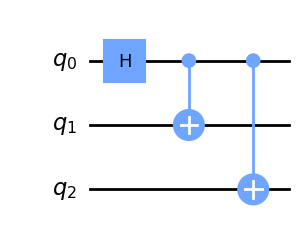

In [5]:
# Draw the circuit
circuit.draw('mpl')

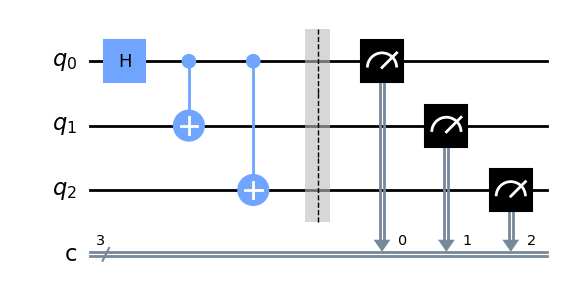

In [6]:
#making a new circuit that we'll measure
meas = QuantumCircuit(3, 3) #3 qubits, and 3 classical bits to record outcome
meas.barrier(range(3)) #just draws a barrier on the circuit
meas.measure(range(3), range(3)) #add the three measurements

#smooshing together the acutal circuit and the measurements on the end
qc = meas.compose(circuit, range(3), front=True)

qc.draw('mpl')

In [7]:
# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(qc, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1024)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 000 and 111 are:",counts)


Total count for 000 and 111 are: {'000': 545, '111': 479}


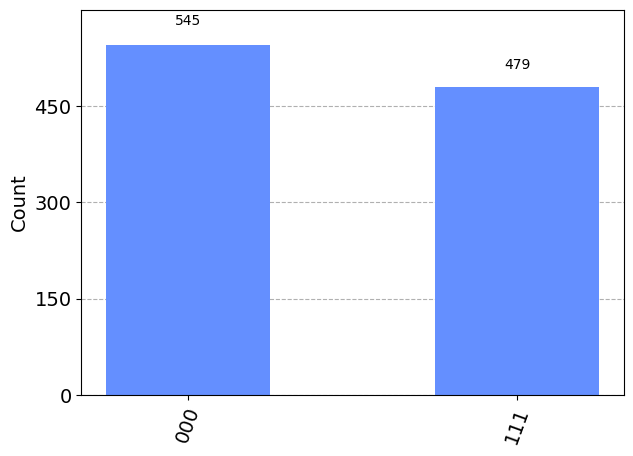

In [8]:
# Plot a histogram
plot_histogram(counts)

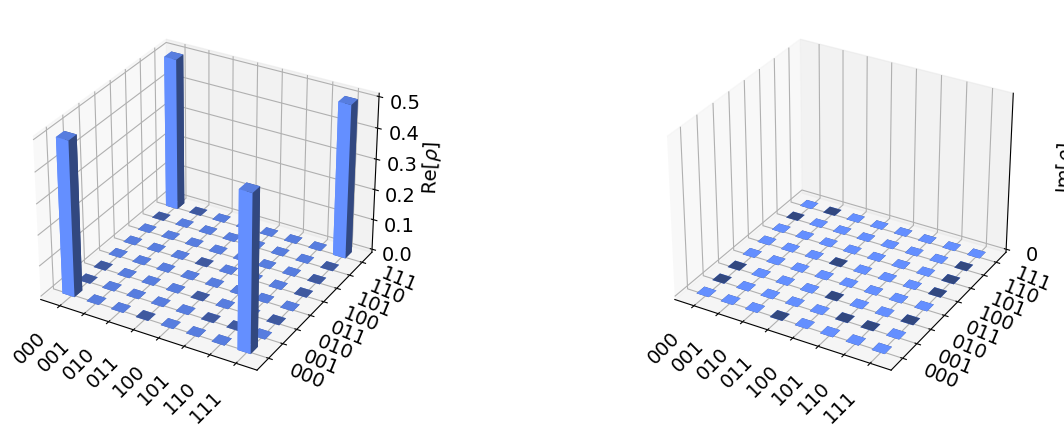

In [9]:
plot_state_city(state)